# Entalpía de Cambio de Fase

Los datos usados son inventados para que calce el gráfico

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Valores de Temperatura

T_sol = np.linspace(-40, 0)
T_liq = np.linspace(0, 100)
T_gas = np.linspace(100, 150)

In [3]:
# Entalpias de cambio de fase

H_fusion = 20
H_ebull = 30

In [4]:
# Entalpia en sólido

H_0 = 20
H_1 = 30

H_sol = np.linspace(H_0, H_1)

In [5]:
# Entalpia en líquido
# Asumiendo funcion logaritmica (raiz para que se note un poco más)

H_liq = np.sqrt(T_liq) + (H_1 + H_fusion)

In [6]:
# Entalpia en gas
# Asumiendo funcion logaritmica

H_2 = H_liq.max()

H_gas = np.log(T_liq + np.exp(1)) + (H_2 + H_ebull)

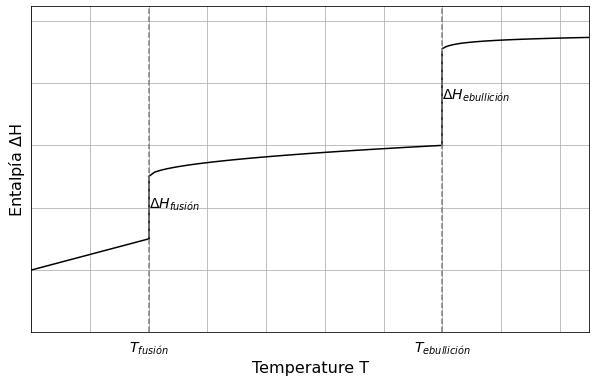

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots()

H_max = H_gas.max() + 10

# Entalpia solido
ax.plot(T_sol, H_sol, "k")
ax.plot([T_sol.max()] * 2, [H_1, H_1 + H_fusion], "k")
# Entalpia líquido
ax.plot(T_liq, H_liq, "k")
# Entalpia gas
ax.plot([T_liq.max()] * 2, [H_liq.max(), H_2 + H_ebull], "k")
ax.plot(T_gas, H_gas, "k")

# Línea de cambio de fase
ax.plot([T_sol.max()] * 2, [0, H_max], "--", c="gray")
ax.plot([T_liq.max()] * 2, [0, H_max], "--", c="gray")

# Visual elements
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    top=False,
    left=False,
    right=False,
    labelbottom=True,
    labelleft=False
)

x_ticks = range(-40, 150 + 10, 20)
ax.set_xticks(x_ticks)

x_ticks_label = [""] * len(x_ticks)
x_ticks_label[x_ticks.index(0)] = r"$T_{fusión}$"
x_ticks_label[x_ticks.index(100)] = r"$T_{ebullición}$"

ax.set_xticklabels(x_ticks_label, fontsize=14)
ax.set_xlabel("Temperature T", fontsize=16)
ax.set_ylabel(r"Entalpía $\Delta$H", fontsize=16)

# Anotaciones
ax.annotate(r"$\Delta H_{fusión}$", (T_sol.max(), H_1 + H_fusion / 2), fontsize=14)
ax.annotate(r"$\Delta H_{ebullición}$", (T_liq.max(), H_2 + H_ebull / 2), fontsize=14)

ax.set_xlim(T_sol.min(), T_gas.max())
ax.set_ylim(0, H_max)
ax.grid()

os.makedirs("entalpia_fase", exist_ok=True)
fig.savefig(os.path.join("entalpia_fase", "entalpia_fase.png"))